INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


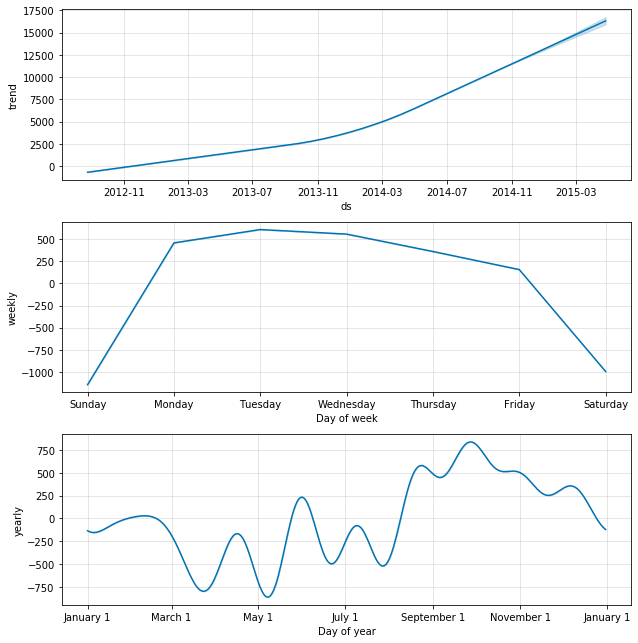

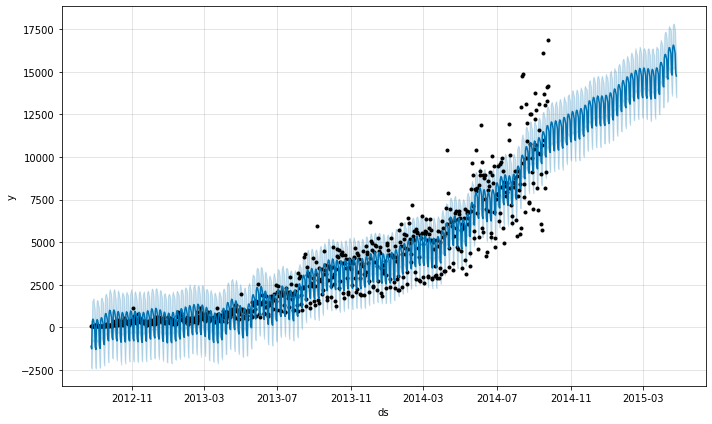

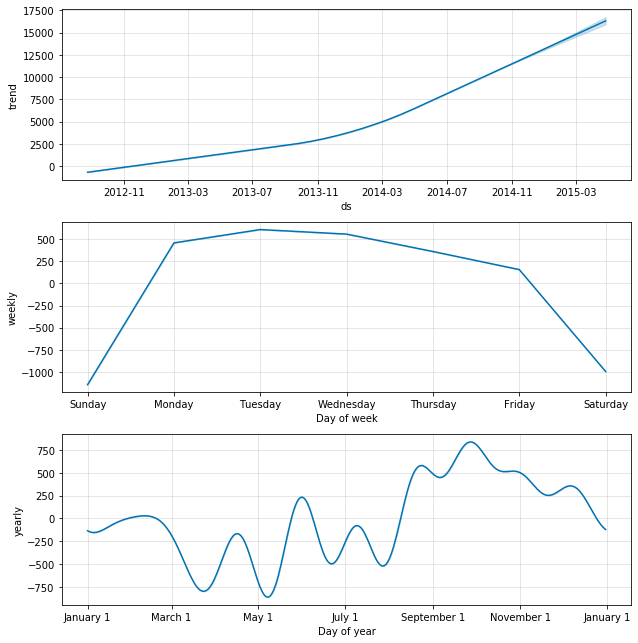

In [2]:
import pandas as pd
from fbprophet import Prophet

df=pd.read_csv('train.csv')

# 转化时间格式
df['Datetime']=pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
# 去掉多余列
df.index=df.Datetime
df.drop(['ID','Datetime'],axis=1,inplace=True)
# 按天统计数据
df_daily=df.resample('D').sum()
df_daily['ds']=df_daily.index
df_daily['y']=df_daily.Count
df_daily.drop(['Count'],axis=1,inplace=True)

# prophet模型
m= Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(df_daily)
# 预测未来7个月
future=m.make_future_dataframe(periods=213)
forecast= m.predict(future)
m.plot(forecast)
m.plot_components(forecast)